In [2]:
import numpy as np
# 定义sigmoid函数
def sigmod(x):
    return 1/(1+np.exp(-x))

# 初始化参数
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [15]:
def logistic(X,y,w,b):
    # 训练样本量
    num_train = X.shape[0]
    # 训练样本维度
    num_feature = X.shape[1]
    # 对数几率回归模型输出
    a = sigmod(np.dot(X,w)+b)
    # 交叉熵损失函数
    cost = -1/num_train*np.sum(y*np.log(a)+(1-y)*np.log(1-a))
    # 权重梯度
    dw = 1/num_train*np.sum(np.dot(X.T,a-y)) # 书上的那个公式是有错误的 并且此处需要考虑自己的转置是怎么来的
    # 偏置梯度
    db = 1/num_train*np.sum(a-y)
    return a,cost,dw,db

In [11]:
def logistic_train(X,y,learning_rate,epochs):
    cost_his = []
    W,b = initialize_with_zeros(X.shape[1])
    for i in range(epochs):
        a,cost,dw,db = logistic(X,y,W,b)
        W = W - learning_rate*dw
        b = b - learning_rate*db
        if i%100 == 0:
            cost_his.append(cost)
            print('Epochs: %d, cost: %f'%(i,cost))

    params = {'w':W,'b':b}
    grads = {'dw':dw,'db':db}

    return cost_his,params

(100, 2)
(100,)
labels {0, 1}


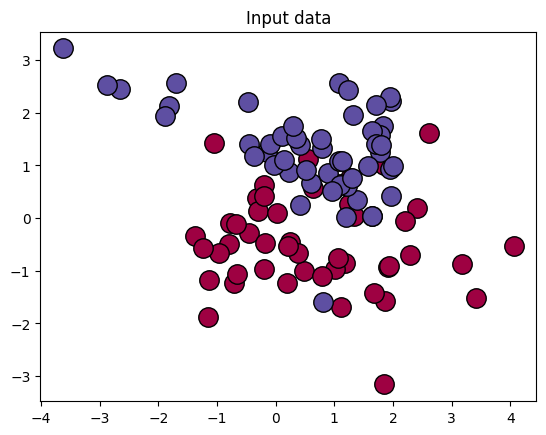

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_classification

# 设置随机数种子
random.seed(2)
np.random.seed(2)

# 生成100 * 2的模拟二分类数据集
X,labels = make_classification(
    n_samples=100,
    n_classes=2,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2
)
print(X.shape)
print(labels.shape)
# 对数据加上一些噪声
X += np.random.uniform(size=X.shape)
# 标签类别数
unique_labels = set(labels)
print("labels",unique_labels)
# 根据类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k,col in zip(unique_labels,colors):
    x_k = X[labels == k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=14)
plt.title('Input data')
plt.show()

In [8]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.2,random_state=2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)

(80, 1)


In [17]:
cost_his,params= logistic_train(X_train,y_train,learning_rate=0.01,epochs=1000)

Epochs: 0, cost: 0.693147
Epochs: 100, cost: 0.605978
Epochs: 200, cost: 0.580869
Epochs: 300, cost: 0.567943
Epochs: 400, cost: 0.559247
Epochs: 500, cost: 0.552801
Epochs: 600, cost: 0.547843
Epochs: 700, cost: 0.543963
Epochs: 800, cost: 0.540894
Epochs: 900, cost: 0.538446


In [18]:
def predict(X,params):
    W = params['w']
    b = params['b']
    y_pred = sigmod(np.dot(X,W)+b)
    y_pred[y_pred>0.5] = 1
    y_pred[y_pred<=0.5] = 0
    return y_pred

In [19]:
from sklearn.metrics import classification_report
y_pred = predict(X_test,params)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.75      0.75      0.75        12

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20

